<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-packages-and-data" data-toc-modified-id="Import-packages-and-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import packages and data</a></span><ul class="toc-item"><li><span><a href="#Check-for-null-values" data-toc-modified-id="Check-for-null-values-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Check for null values</a></span></li><li><span><a href="#Check-for-negative-values" data-toc-modified-id="Check-for-negative-values-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Check for negative values</a></span></li></ul></li><li><span><a href="#Detecting-and-handling-outliers" data-toc-modified-id="Detecting-and-handling-outliers-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Detecting and handling outliers</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Utils-functions" data-toc-modified-id="Utils-functions-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Utils functions</a></span></li></ul></li><li><span><a href="#1.-declared_handling_days" data-toc-modified-id="1.-declared_handling_days-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>1. declared_handling_days</a></span></li><li><span><a href="#2.-shipping_fee" data-toc-modified-id="2.-shipping_fee-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2. shipping_fee</a></span></li><li><span><a href="#3.-Carrier-max-estimate" data-toc-modified-id="3.-Carrier-max-estimate-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>3. Carrier max estimate</a></span></li><li><span><a href="#4.-carrier_min_estimate" data-toc-modified-id="4.-carrier_min_estimate-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>4. carrier_min_estimate</a></span></li><li><span><a href="#5.-item_price" data-toc-modified-id="5.-item_price-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>5. item_price</a></span></li><li><span><a href="#6.-quantity" data-toc-modified-id="6.-quantity-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>6. quantity</a></span></li><li><span><a href="#7.-weight" data-toc-modified-id="7.-weight-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>7. weight</a></span></li><li><span><a href="#8.-distance_between_pincodes" data-toc-modified-id="8.-distance_between_pincodes-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>8. distance_between_pincodes</a></span></li></ul></li></ul></div>

# Import packages and data

* [Check for null values](#section-one)

In [1]:
from ebay_delivery_prediction_project import preprocessing, Visualisation, preprocessing_models, postprocessing
preprocessing.import_test()

from datetime import datetime, timedelta
import numpy as np
import pandas as pd

Preprocessing successfully imported.


In [2]:
training_data = pd.read_csv(r"C:\Users\msidda2\Documents\GitHub\ebay_delivery_prediction_competition\data\preprocessed_data\preprocessed_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\msidda2\\Documents\\GitHub\\ebay_delivery_prediction_competition\\data\\preprocessed_data\\preprocessed_data.csv'

In [2]:
import os

preprocessed_file_name = "preprocessed_data.csv"
preprocessed_data_folder = "preprocessed_data"

preprocessed_data_folder_path = os.path.join("../data", preprocessed_data_folder)
preprocessed_data_path = os.path.join(preprocessed_data_folder_path, preprocessed_file_name)

training_data = pd.read_csv(preprocessed_data_path)

In [3]:
columns = training_data.columns
num_of_rows = 15000000
target_column = "delivery_calendar_days"

In [ ]:
training_data = preprocessing.drop_bad_values(training_data)

In [13]:
training_data['declared_handling_days'].fillna(training_data['declared_handling_days'].median(), inplace=True)
training_data['distance_between_pincodes'].fillna(training_data['distance_between_pincodes'].median(), inplace=True)


In [14]:
training_data.isnull().sum()

b2c_c2c                      0
seller_id                    0
declared_handling_days       0
acceptance_scan_timestamp    0
shipment_method_id           0
shipping_fee                 0
carrier_min_estimate         0
carrier_max_estimate         0
item_zip                     0
buyer_zip                    0
category_id                  0
item_price                   0
quantity                     0
payment_datetime             0
delivery_date                0
weight                       0
weight_units                 0
package_size                 0
record_number                0
delivery_calendar_days       0
cleaned_item_zip             0
cleaned_buyer_zip            0
distance_between_pincodes    0
dtype: int64

<a id="section-one"></a>
## Check for null values

In [4]:
training_data.isnull().sum()

b2c_c2c                           0
seller_id                         0
declared_handling_days       702886
acceptance_scan_timestamp         0
shipment_method_id                0
shipping_fee                      0
carrier_min_estimate              0
carrier_max_estimate              0
item_zip                          1
buyer_zip                         1
category_id                       0
item_price                        0
quantity                          0
payment_datetime                  0
delivery_date                     0
weight                            0
weight_units                      0
package_size                      0
record_number                     0
delivery_calendar_days            0
cleaned_item_zip               5001
cleaned_buyer_zip               608
distance_between_pincodes    178381
dtype: int64

<a id='section-two'></a>
## Check for negative values

In [67]:
data = training_data.copy()

In [68]:
different_types_of_encoding = ["one-hot", "numerical"]

cols_and_encoding = {
    "b2c_c2c"   : "one-hot",
    "seller_id"   : 6365,
    "declared_handling_days"   : "numerical",
    "acceptance_scan_timestamp"   : 9848,
    "shipment_method_id"   : "one-hot",
    "shipping_fee"   : "numerical",
    "carrier_min_estimate"   : "numerical",
    "carrier_max_estimate"   : "numerical",
    "item_zip"   : 4701, # Needs a lot of preprocessing.
    "buyer_zip"   : 6880, # Needs a lot of preprocessing.
    "category_id"   : 'one-hot', # Only has 33 unique values in 15,000,000 rows so one-hot.
    "item_price"   : "numerical",
    "quantity"   : "numerical",
    "payment_datetime"   : 9998,
    "delivery_date"   : 602,
    "weight"   : "numerical",
    "weight_units"   : 1,
    "package_size"   : "one-hot",
    "record_number"   : 10000,
    "delivery_calendar_days"   : "target",
    "cleaned_item_zip" : 30743,
    "cleaned_buyer_zip" : 34876,
    "distance_between_pincodes" : "numerical",
}

In [39]:
def getNumericalValues(cols_and_encoding):
    numerical_columns = []
    for col in cols_and_encoding:
        if cols_and_encoding[col] == "numerical":
            numerical_columns.append(col)
    return numerical_columns

In [40]:
numerical_columns = getNumericalValues(cols_and_encoding)

In [41]:
numerical_columns

['declared_handling_days',
 'shipping_fee',
 'carrier_min_estimate',
 'carrier_max_estimate',
 'item_price',
 'quantity',
 'weight',
 'distance_between_pincodes']

In [42]:
for col in numerical_columns:
    col_data = data[col]
    negative_mask = col_data < 0
    col_data[negative_mask] = np.nan
    data[col] = col_data

C:\Users\LOCAL_~2\Temp/ipykernel_25688/2399751912.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col_data[negative_mask] = np.nan


In [43]:
sum_na = data.isnull().sum()

In [44]:
sum_na

b2c_c2c                           0
seller_id                         0
declared_handling_days       702886
acceptance_scan_timestamp         0
shipment_method_id                0
shipping_fee                     21
carrier_min_estimate           1095
carrier_max_estimate           1095
item_zip                          1
buyer_zip                         1
category_id                       0
item_price                        0
quantity                          0
payment_datetime                  0
delivery_date                     0
weight                            0
weight_units                      0
package_size                      0
record_number                     0
delivery_calendar_days            0
cleaned_item_zip               5001
cleaned_buyer_zip               608
distance_between_pincodes    178381
dtype: int64

In [45]:
na_columns = []
for i in range(len(sum_na)):
    if sum_na[i] != 0:
        if int((sum_na[i] / num_of_rows) * 100) == 0:
            na_columns.append(columns[i])

In [46]:
na_columns

['shipping_fee',
 'carrier_min_estimate',
 'carrier_max_estimate',
 'item_zip',
 'buyer_zip',
 'cleaned_item_zip',
 'cleaned_buyer_zip']

In [47]:
# drop the negative values which are less than 1 percent of the data
data = data.dropna(subset = na_columns)

In [48]:
data.isnull().sum()

b2c_c2c                           0
seller_id                         0
declared_handling_days       702649
acceptance_scan_timestamp         0
shipment_method_id                0
shipping_fee                      0
carrier_min_estimate              0
carrier_max_estimate              0
item_zip                          0
buyer_zip                         0
category_id                       0
item_price                        0
quantity                          0
payment_datetime                  0
delivery_date                     0
weight                            0
weight_units                      0
package_size                      0
record_number                     0
delivery_calendar_days            0
cleaned_item_zip                  0
cleaned_buyer_zip                 0
distance_between_pincodes    172387
dtype: int64

# Detecting and handling outliers

### Utils functions

In [49]:
def drawRequiredGraphs(data, col):
    print(data[col].describe())
    data[col].hist()

In [50]:
def squeeze_outlier_with_interquantile_range(data, col):
    sorted(data[col])
    Q1, Q3 = data[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    print('lower_limit: ', lower_limit, 'upper_limit: ', upper_limit)
    upper_rows = data[data[col] > upper_limit]
    lower_rows = data[data[col] < lower_limit]
    outlier_rows = pd.concat([upper_rows, lower_rows])
    data[col] = np.where(data[col] >= upper_limit, upper_limit, data[col])
    data[col] = np.where(data[col] <= lower_limit, lower_limit, data[col])
    return data, outlier_rows

In [51]:
def getOutlierLimit(data, col):
    sorted(data[col])
    Q1, Q3 = data[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return lower_limit, upper_limit

In [52]:
numerical_columns

['declared_handling_days',
 'shipping_fee',
 'carrier_min_estimate',
 'carrier_max_estimate',
 'item_price',
 'quantity',
 'weight',
 'distance_between_pincodes']

## 1. declared_handling_days

In [53]:
column_in_analysis = 'declared_handling_days'

In [54]:
data[column_in_analysis].describe()

count    1.429108e+07
mean     1.620788e+00
std      1.498381e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      4.000000e+01
Name: declared_handling_days, dtype: float64

<AxesSubplot:>

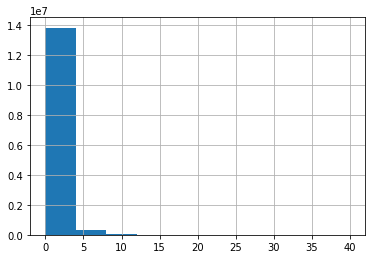

In [55]:
data[column_in_analysis].hist()

<AxesSubplot:>

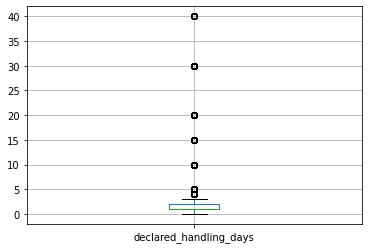

In [56]:
data.boxplot(column=column_in_analysis)

In [36]:
getOutlierLimit(data, column_in_analysis)

(-0.5, 3.5)

In [58]:
data[column_in_analysis].value_counts()

1.0     7844615
2.0     2574340
3.0     2418317
0.0     1012339
5.0      224804
4.0      123120
10.0      61828
15.0      13009
30.0      10901
20.0       7737
40.0         72
Name: declared_handling_days, dtype: int64

In [59]:
data[column_in_analysis].value_counts().describe()

count    1.100000e+01
mean     1.299189e+06
std      2.377842e+06
min      7.200000e+01
25%      1.195500e+04
50%      1.231200e+05
75%      1.715328e+06
max      7.844615e+06
Name: declared_handling_days, dtype: float64

In [ ]:
data[column_in_analysis]

## 2. shipping_fee

In [73]:
column_in_analysis = 'shipping_fee'

count    1.500000e+07
mean     2.811783e+00
std      5.373618e+00
min     -3.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.000000e+00
max      2.000000e+03
Name: shipping_fee, dtype: float64


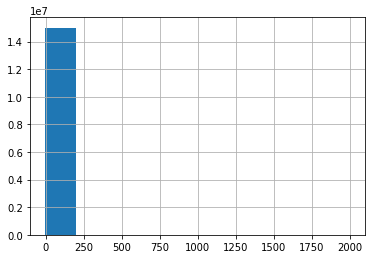

In [74]:
drawRequiredGraphs(data, column_in_analysis)

<AxesSubplot:>

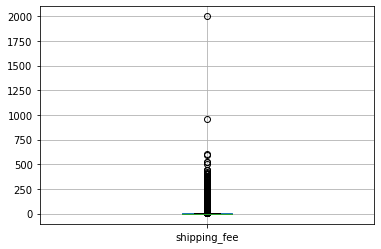

In [75]:
data.boxplot(column=column_in_analysis)

In [76]:
data[column_in_analysis].value_counts()

0.00      9000100
3.50       327017
3.75       223857
4.00       186832
3.00       186692
           ...   
47.08           1
89.90           1
99.85           1
136.85          1
74.57           1
Name: shipping_fee, Length: 7044, dtype: int64

## 3. Carrier max estimate

In [77]:
column_in_analysis = 'carrier_max_estimate'

<AxesSubplot:>

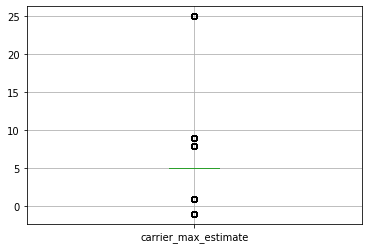

In [78]:
training_data.boxplot(column=column_in_analysis)

count    1.500000e+07
mean     5.462125e+00
std      1.229274e+00
min     -1.000000e+00
25%      5.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      2.500000e+01
Name: carrier_max_estimate, dtype: float64


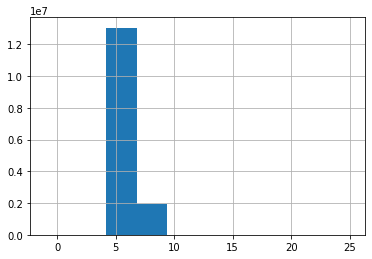

In [80]:
drawRequiredGraphs(data, column_in_analysis)

In [84]:
data[column_in_analysis].value_counts()

 5     13055377
 9      1154125
 8       780997
 1         7882
-1         1095
 25         524
Name: carrier_max_estimate, dtype: int64

In [83]:
getOutlierLimit(data, column_in_analysis)

(5.0, 5.0)

In [81]:
outlier_data_frame1 = data[data[column_in_analysis] < 5]

In [82]:
len(outlier_data_frame1)

8977

In [23]:
outlier_data_frame2 = data[data['carrier_max_estimate'] > 10]

In [24]:
len(outlier_data_frame2)

397

In [25]:
outlier_data = pd.concat([outlier_data_frame1, outlier_data_frame2])

In [26]:
len(outlier_data)

8263

In [27]:
len(data['carrier_max_estimate'])

14993504

In [28]:
final_data = data[data['carrier_max_estimate'] <= 10]

In [29]:
len(final_data)

14993107

In [30]:
final_data = final_data[final_data['carrier_max_estimate'] >= 5]

In [31]:
len(final_data)

14985241

Outlier less than 5 and greater 10 are removed from carrier_max_estiamate

## 4. carrier_min_estimate 

In [ ]:
column_in_analysis = 'carrier_min_estimate'

In [32]:
final_data[column_in_analysis].describe()

count    1.498524e+07
mean     2.623174e+00
std      4.845908e-01
min      2.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: carrier_min_estimate, dtype: float64

<AxesSubplot:>

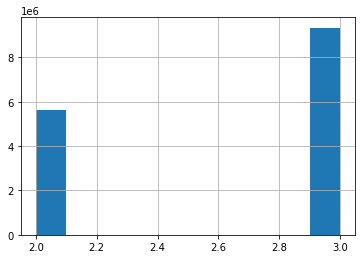

In [33]:
final_data[column_in_analysis].hist()

<AxesSubplot:>

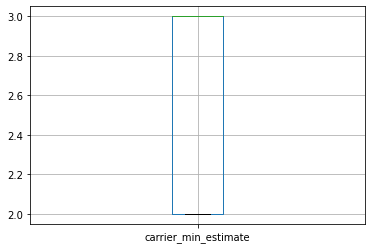

In [34]:
final_data.boxplot(column=column_in_analysis)

No outliers in carrier_min_estimate

## 5. item_price

In [85]:
column_in_analysis = "item_price"

count    1.500000e+07
mean     3.613771e+01
std      1.099163e+02
min      0.000000e+00
25%      8.750000e+00
50%      1.500000e+01
75%      3.025000e+01
max      6.000000e+04
Name: item_price, dtype: float64


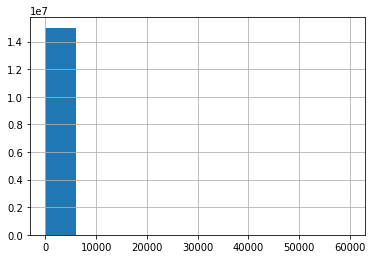

In [87]:
drawRequiredGraphs(data, column_in_analysis)

<AxesSubplot:>

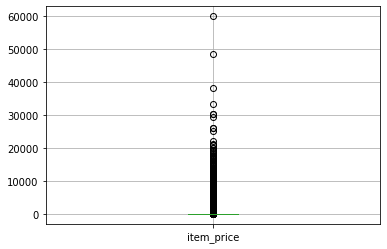

In [88]:
data.boxplot(column=column_in_analysis)

In [47]:
(len(final_data[final_data[column_in_analysis] > 500]) / len(final_data)) * 100

0.49028240520122435

In [48]:
outlier_max = final_data[final_data[column_in_analysis] > 500]

In [49]:
outlier_data = pd.concat([outlier_data, outlier_max])

In [51]:
len(outlier_data)

81733

In [50]:
final_data = final_data[final_data[column_in_analysis] <= 500]
len(final_data)

14911771

## 6. quantity

In [60]:
column_in_analysis = 'quantity'

count    1.500000e+07
mean     3.613771e+01
std      1.099163e+02
min      0.000000e+00
25%      8.750000e+00
50%      1.500000e+01
75%      3.025000e+01
max      6.000000e+04
Name: item_price, dtype: float64


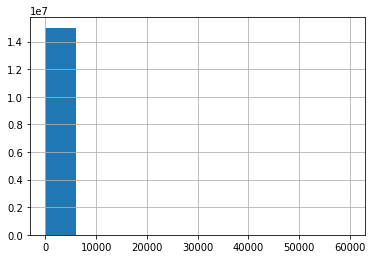

In [89]:
drawRequiredGraphs(data, column_in_analysis)

<AxesSubplot:>

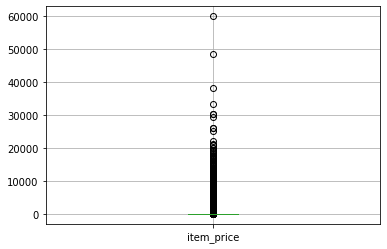

In [90]:
data.boxplot(column=column_in_analysis)

In [73]:
data[column_in_analysis].value_counts()

0     9316129
1     2831036
2      811119
3      779683
4      287438
5      250443
6      175080
7      134375
8      122273
9       36997
10      27027
16         10
Name: shipment_method_id, dtype: int64

In [83]:
final_data1, outlier_data1 = squeeze_outlier_with_interquantile_range(final_data, column_in_analysis)

lower_limit:  -1.5 upper_limit:  2.5


In [ ]:
len(final_data1)

In [79]:
len(outlier_data1)

1813326

In [81]:
len(outlier_data)

221894

## 7. weight

In [84]:
column_in_analysis = 'weight'

count    1.482162e+07
mean     1.773657e+03
std      1.187889e+03
min      0.000000e+00
25%      7.963749e+02
50%      1.530124e+03
75%      2.742537e+03
max      1.646254e+04
Name: distance_between_pincodes, dtype: float64


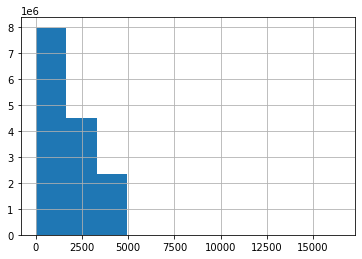

In [94]:
drawRequiredGraphs(data, column_in_analysis)

<AxesSubplot:>

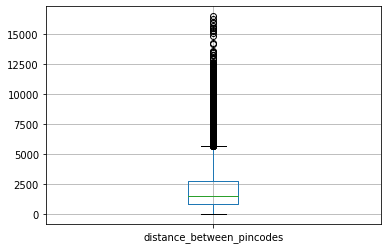

In [95]:
data.boxplot(column=column_in_analysis)

In [96]:
getOutlierLimit(data, column_in_analysis)

(-2122.8684791239148, 5661.780535778149)

## 8. distance_between_pincodes

In [91]:
column_in_analysis = 'distance_between_pincodes'

count    1.482162e+07
mean     1.773657e+03
std      1.187889e+03
min      0.000000e+00
25%      7.963749e+02
50%      1.530124e+03
75%      2.742537e+03
max      1.646254e+04
Name: distance_between_pincodes, dtype: float64


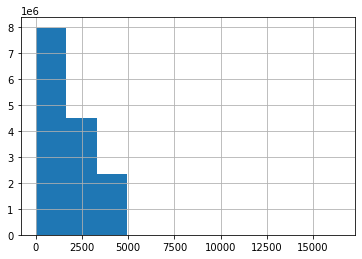

In [92]:
drawRequiredGraphs(data, column_in_analysis)

In [93]:
data[column_in_analysis].value_counts().describe()

count    1.191549e+07
mean     1.243895e+00
std      3.161099e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.038100e+04
Name: distance_between_pincodes, dtype: float64